
## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



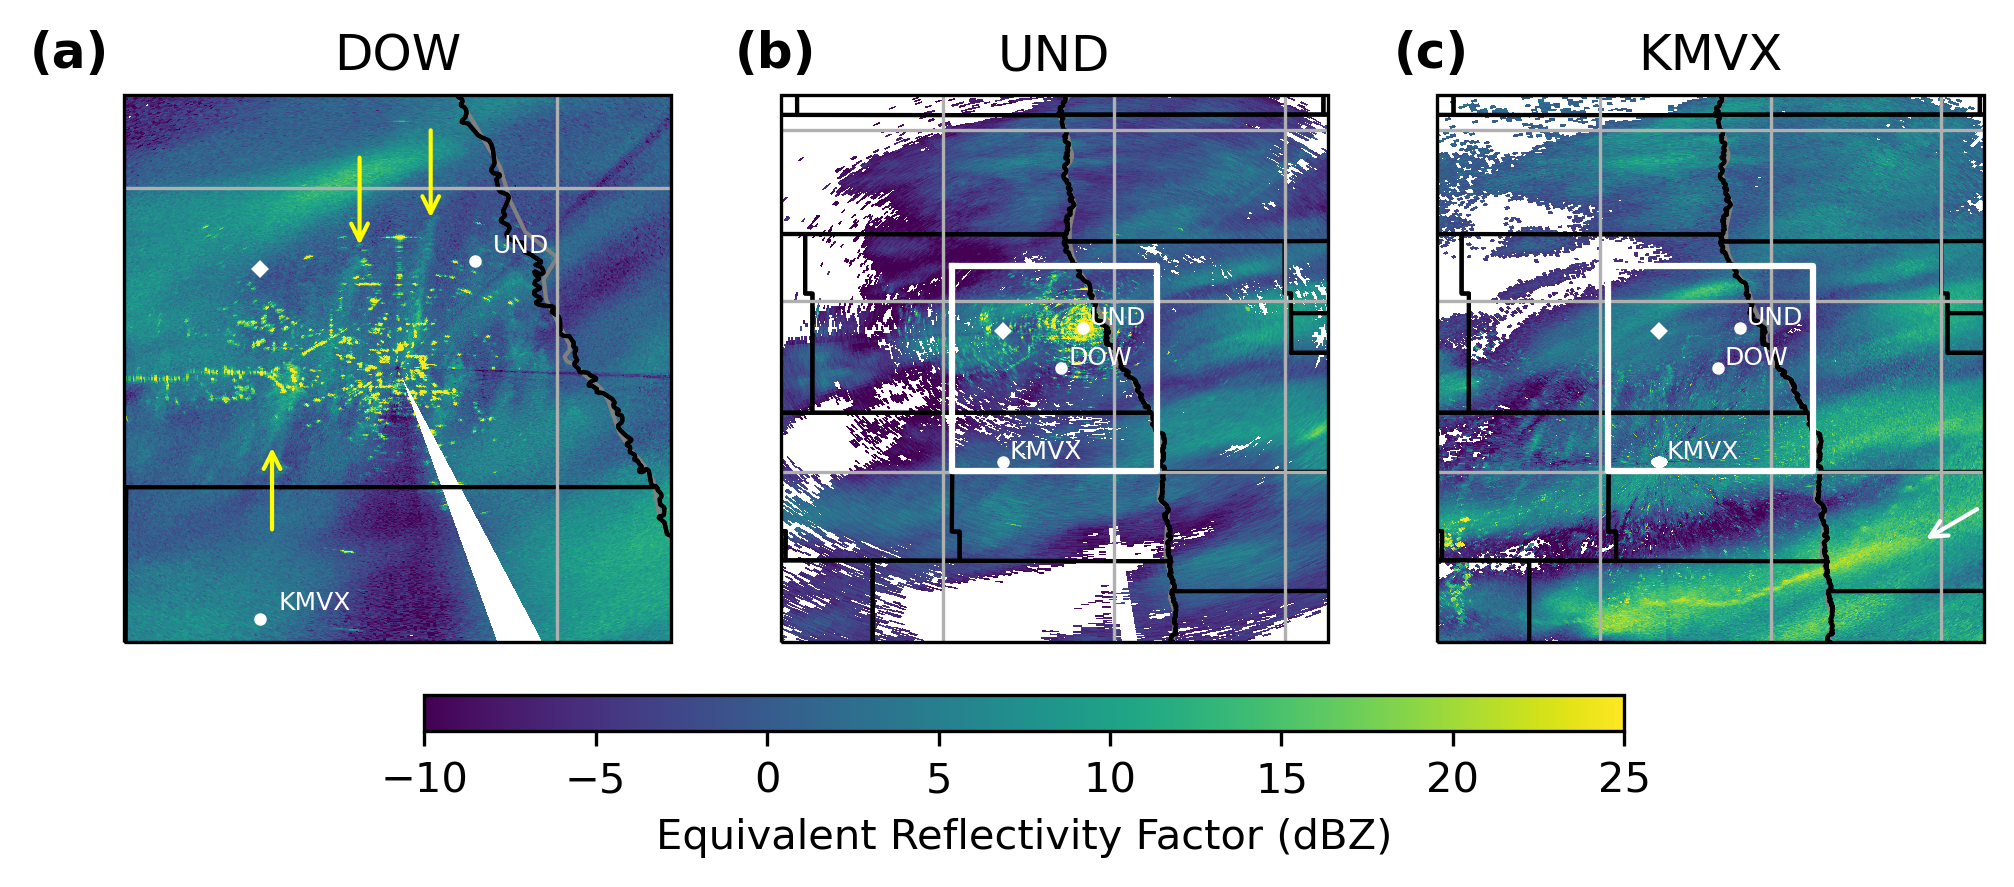

In [1]:
# Program to plot KMVX, UND radar, and DOW radar reflectivity, all at one time in a three-panel setup
# Originally created by Alec Sczepanski, edited by Aaron Kennedy
# Last edit on 14 Feb 2021
import matplotlib.pyplot as plt
import pyart
import netCDF4
import os
import cartopy.crs as ccrs
import numpy as np
import metpy
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES
import warnings
warnings.filterwarnings('ignore')
# Read in files

# DOW:
fname_DOW = 'data/cfrad.20200212_084054.128_to_20200212_084123.800_DOW7low_SUR.nc'

# UND:
fname_UND = 'data/UND200212084005.RAWM9SL'

# Mayville:
fname_MVX = 'data/KMVX20200212_084002_V06'

# Process DOW first:
radar_DOW = pyart.io.read_cfradial(fname_DOW)
radar_DOW.metadata['instrument_name'] = 'DOW7low'
radar_DOW.azimuth['data'] = (radar_DOW.azimuth['data'] - 180.) % 360. #Rotating image 180 deg to orient with north
display_DOW = pyart.graph.RadarMapDisplay(radar_DOW)

center_lon = radar_DOW.longitude['data'][0]
center_lat = radar_DOW.latitude['data'][0]

min_lat = center_lat - 0.8
max_lat = center_lat + 0.8
min_lon = center_lon - 0.8
max_lon = center_lon + 0.8

dowlons = [min_lon+.5, max_lon-.5, max_lon-.5, min_lon+.5,min_lon+.5] #bounds for red box
dowlats = [max_lat-.5, max_lat-.5, min_lat+.5, min_lat+.5,max_lat-.5]
# Process UND second:
radar_UND = pyart.io.read(fname_UND)
display_UND = pyart.graph.RadarMapDisplay(radar_UND)

#Use gatefilter to mask out noise and ground clutter around radar
gatefilter = pyart.correct.GateFilter(radar_UND)
gatefilter.exclude_below('cross_correlation_ratio', 0.5, exclude_masked = True)


# Finally, process KMVX:
radar_MVX = pyart.io.read(fname_MVX)

center_lon_MVX = radar_MVX.longitude['data'][0]
center_lat_MVX = radar_MVX.latitude['data'][0]

display_MVX = pyart.graph.RadarMapDisplay(radar_MVX)



# Time to plot a 1x3 plot
projection = ccrs.PlateCarree()
fig = plt.figure(figsize = [8,4],dpi=300,facecolor='white')

lons=[-98,-97.5,-97,-96.5,-96,-95.5-95]
lats=[46,46.5,47,47.5,48]
#DOW
ax1 = fig.add_subplot(131, projection = projection)
display_DOW.plot_ppi_map('DBZHC',
        0,raster=True,
        vmin = -10,
        vmax = 25,
        min_lon = min_lon+.5,
        max_lon = max_lon-.5,
        min_lat = min_lat+.5,
        max_lat = max_lat-.5,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'DOW',
        cmap = 'viridis',
        lat_lines=np.arange(45, 49, 0.5), 
        lon_lines=np.arange(-99, -94, 0.5))
ax1.add_feature(USCOUNTIES.with_scale('5m'))
ax1.text(-.1, 1.05,'(a)',horizontalalignment='center',fontsize=12,transform=ax1.transAxes,weight='bold')
ax1.plot(-97.3254,47.9117,color='white',transform=ccrs.PlateCarree(),marker='D',zorder=2,markersize=2)
ax1.plot(-97.09, 47.92,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax1.text(-97.07, 47.93,'UND',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax1.plot(center_lon_MVX, center_lat_MVX,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax1.text(center_lon_MVX+.02, center_lat_MVX+.01,'KMVX',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax1.annotate("",xy=(0.56, 0.76), xycoords='axes fraction',xytext=(0.56, 0.95), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="yellow"))
ax1.annotate("",xy=(0.43,0.71), xycoords='axes fraction',xytext=(0.43,0.90), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="yellow"))
ax1.annotate("",xy=(0.27,0.37), xycoords='axes fraction',xytext=(0.27,0.19), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="yellow"))

#UND

ax2 = fig.add_subplot(132, projection = projection)

display_UND.plot_ppi_map('reflectivity',
        3,raster=True, #Sweep number 0=0.5deg, 1=1.0deg, 2=1.5deg, 3=2.0deg, 4=2.75deg, 5=3.5deg, 6=4.25deg, 7=5.0deg, 8=6.0deg, 9=7.0deg
        vmin = -10,
        vmax = 25,
        min_lon = min_lon,
        max_lon = max_lon,
        min_lat = min_lat,
        max_lat = max_lat,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'UND',
        cmap = 'viridis',
        gatefilter = gatefilter,
        lat_lines=np.arange(45, 49, 0.5), 
        lon_lines=np.arange(-99, -94, 0.5))
ax2.add_feature(USCOUNTIES.with_scale('5m'))

ax2.text(-.01, 1.05,'(b)',horizontalalignment='center',fontsize=12,transform=ax2.transAxes,weight='bold')
ax2.plot(dowlons, dowlats, transform=ccrs.PlateCarree(),linewidth=1.5,color="white",zorder=2)
ax2.plot(-97.3254,47.9117,color='white',transform=ccrs.PlateCarree(),marker='D',zorder=2,markersize=2)
ax2.plot(-97.1547, 47.8025,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax2.text(-97.1347, 47.8125,'DOW',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax2.plot(-97.09, 47.92,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax2.text(-97.07, 47.93,'UND',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax2.plot(center_lon_MVX, center_lat_MVX,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax2.text(center_lon_MVX+.02, center_lat_MVX+.01,'KMVX',color='white',transform=ccrs.PlateCarree(),fontsize=6)
#KMVX
ax3 = fig.add_subplot(133, projection = projection)


display_MVX.plot_ppi_map('reflectivity',
        0,raster=True,
        vmin = -10,
        vmax = 25,
        min_lon = min_lon,
        max_lon = max_lon,
        min_lat = min_lat,
        max_lat = max_lat,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'KMVX',
        cmap = 'viridis',
        lat_lines=np.arange(45, 49, 0.5), 
        lon_lines=np.arange(-99, -94, 0.5))
ax3.add_feature(USCOUNTIES.with_scale('5m'))
ax3.text(-.01, 1.05,'(c)',horizontalalignment='center',fontsize=12,transform=ax3.transAxes,weight='bold')
ax3.plot(dowlons, dowlats, transform=ccrs.PlateCarree(),linewidth=1.5,color="white",zorder=2)
ax3.plot(-97.3254,47.9117,color='white',transform=ccrs.PlateCarree(),marker='D',zorder=2,markersize=2)
ax3.plot(-97.1547, 47.8025,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax3.text(-97.1347, 47.8125,'DOW',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax3.plot(-97.09, 47.92,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax3.text(-97.07, 47.93,'UND',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax3.plot(center_lon_MVX, center_lat_MVX,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax3.text(center_lon_MVX+.02, center_lat_MVX+.01,'KMVX',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax3.annotate("",xy=(0.88, 0.18), xycoords='axes fraction',xytext=(1, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="white"))
#Setup colorbar
colorbar_panel_axes = [0.25, 0.2, 0.5, 0.03]
cbax = fig.add_axes(colorbar_panel_axes)
display_MVX.plot_colorbar(cax=cbax,orient='horizontal', label='Equivalent Reflectivity Factor (dBZ)')
plt.tight_layout()

plt.savefig('BAMS_3_panel_radar_0840UTC.png',bbox_inches='tight')
plt.show()



In [52]:
print(np.arange(-99,-94, 0.5))

[-99.  -98.5 -98.  -97.5 -97.  -96.5 -96.  -95.5 -95.  -94.5]
